<a id="s-top"></a>
# Kaggle 2020 State of Data Science Survey
Kaggle is the world leader for competitive Data Science. Since 2017 it has conducted an annual survey of the state of Data Science. This notebook will conduct an EDA of the data in the 2020 survey. The focus of this EDA will be on how Data Science varies by country.

Please leave any feedback in the comments below.



<a id="s-0"></a>
## Contents
* [Responses per Country](#s-1)
    - [Comparison to 2019](#s-1a)
* [Breakdown by Country and Age](#s-2)
    - [Note about the Sample Data](#s-2a)
* [Breakdown by Country and Highest Educational Achievement](#s-3)
* [Breakdown by Country and Online Educational Platform](#s-3alt)
* [Breakdown by Country and Job Title](#s-4)
    - [Proportion of Respondents who are Data Scientists](#s-4a)
* [Breakdown by Country and Years of Coding Experience](#s-5)
* [Recommended Programming Language for aspiring Data Scientists by Country](#s-6)
* [Breakdown by Country and Type of Computing Platform](#s-7)
* [Breakdown by Country and TPU Usage](#s-8)
* [Breakdown by Country and Years using ML Methods](#s-9)
* [Breakdown by Country and Primary Analysis Toolset](#s-9x)
* [Breakdown by Country and Company Size](#s-10)
* [Breakdown by Country and Number of People Responsible for Data Science workloads](#s-11)
* [Breakdown by Country and Machine Learning reaching Production](#s-12)
* [Breakdown of Rates of Pay by Country](#s-13)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import altair as alt
#enable altair to plot all the data
alt.data_transformers.disable_max_rows()
alt.themes.enable('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="s-1"></a>
## Responses per Country
[Back to Contents](#s-0)

First we will see how many responses there were in each country.

In [ ]:
# Load the data
df_survey_responses = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
df_multi_choice = pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv")

In [ ]:
df_survey_responses['Q3'].unique()

In [ ]:
def abbreviate_nations(df):
    df = df.drop(0, axis=0)
    #shorten longest country names
    df.loc[df['Q3']=="United Kingdom of Great Britain and Northern Ireland", "Q3"] = "United Kingdom"
    df.loc[df['Q3']=="Iran, Islamic Republic of...", "Q3"] = "Iran"
    df.loc[df['Q3']=="Republic of Korea", "Q3"] = "South Korea"
    
    return df

In [ ]:
col_list = df_survey_responses.columns.to_list()
col_list
#create a mapping dict from question id to question content
question_mapping = df_survey_responses.loc[0].to_dict()
print(question_mapping)

df_survey_responses = abbreviate_nations(df_survey_responses)
df_multi_choice = abbreviate_nations(df_multi_choice)

In [ ]:
country_2019 = df_multi_choice.groupby(['Q3'])
df_country_2019 = country_2019.agg('count')
df_country_2019.reset_index(inplace=True)
df_country_2019=df_country_2019[['Q3', 'Q1']]
df_country_2019.columns=('Country', 'Count')
df_country_2019['year'] = 2019
df_country_2019.tail()

In [ ]:
country = df_survey_responses.groupby(['Q3'])
df_country = country.agg('count')
df_country.reset_index(inplace=True)
df_country=df_country[['Q3', 'Q1']]
df_country.columns=('Country', 'Count')
df_country['year'] = 2020
df_country.tail()

In [ ]:
df_country_comparison = df_country.append(df_country_2019).reset_index(drop=True)
df_country_comparison.tail()

In [ ]:
def chart_country(df, sort=None):
    chart_country_groups = alt.Chart(df_country).mark_bar().encode(
    alt.X('Country:N', sort=sort, axis=alt.Axis(grid=False)),
    alt.Y('Count:Q', title="Count of Responses", axis=alt.Axis(grid=False))
    ).properties(width=680,
    background='#f5f5f5',title={
"text": ["Number of Respondents per Country"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
}
    )
    
    return chart_country_groups

chart_country_groups = chart_country(df_country)

In [ ]:
#countries sorted by count
df_country = df_country.sort_values(by=['Count'], ascending=False)
country_sort = df_country['Country'].to_list()
chart_country_groups = chart_country(df_country)

chart_country_groups

In [ ]:
df_country_count_by_year = df_country.merge(df_country_2019, left_on='Country', right_on='Country',
          suffixes=(None, '_2019'))
df_country_count_by_year.tail()

Here we can see responses by country. India leads the way by a large margin from the USA. In third place is "Other" which is all other countries not on the list aggregated into one category. 

<a id="s-1a"></a>
OK, let's compare this year's response counts to last year's survey responses. 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
#year_2019 = df_country_comparison.loc[df_country_comparison['year']==2019, "C"]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(df_country_count_by_year['Country']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))

rects1 = ax.bar(x - width/2, df_country_count_by_year['Count_2019'], width, label='2019')
rects2 = ax.bar(x + width/2, df_country_count_by_year['Count'], width, label='2020')

 # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Responses', fontsize=14)
ax.set_xlabel('Country', fontsize=14)
ax.set_title('Survey Responses by Country and Year', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(df_country_count_by_year['Country'])
ax.set_facecolor('k')
ax.patch.set_alpha(0.25)
plt.xticks(rotation=90)
fig.patch.set_alpha(0.5)
ax.legend()
ax.annotate('Responses from India increased', xy=(0.5, 4250), xytext=(3, 4500),
            arrowprops=dict(facecolor='black'),
            )
ax.annotate('Responses from the USA decreased', xy=(1.5, 2000), xytext=(4, 2250),
            arrowprops=dict(facecolor='black'),
            )



#fig.tight_layout()
plt.show()

We can also see that the number of responses from India increased noticeably from 2019 to  2020 but the responses from the USA fell in 2020 compared to 2019. The comparison chart only shows countries which were recorded in both years. It appears that a minimum count of 50 is required for the country to be included a distinct nation in the survey. Otherwise the data gets bucketed to the "Other" category. This category had more responses in 2020 compared to 2019. Let's take a look at the year-on-year change by countries.

In [ ]:
df_country_count_by_year['yoy_change_pct'] = 100 * (df_country_count_by_year['Count'] - df_country_count_by_year['Count_2019']) / df_country_count_by_year['Count_2019']

In [ ]:
alt.Chart(df_country_count_by_year).mark_bar().encode(
    alt.X('Country:N', axis=alt.Axis(grid=False, labelAngle=270)),
    alt.Y('yoy_change_pct:Q', title="Year-on-Year Change in Responses %", axis=alt.Axis(grid=False)),
    color=alt.condition(
        alt.datum.yoy_change_pct > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=680,
    background='#f5f5f5',title={
"text": ["% Year-on-Year Change in Responses by Country from 2019 to 2020"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
}
    )


Thailand had the biggest year-on-year increase in responses followed by Indonesia, Iran and Malaysia. Ireland had the biggest fall followed by Canada.

How would that look on a map? The chart below is interactive. Feel free to zoom into your home country. If you click on a country you can get the percentage displayed in a popup. (credit to this [notebook](https://www.kaggle.com/anshulverma2207/kaggle-data-survey-2020) for some insights into this map.)

In [ ]:
import pycountry
import plotly.express as px

countries, counts = np.unique(df_country_count_by_year['Country'].values.tolist(), return_counts=True)

countries_w_codes = {}
for country in pycountry.countries:
    countries_w_codes[country.name] = country.alpha_3

codes = [countries_w_codes.get(country, f'{country}') for country in countries]

In [ ]:
'''
There are some countries with no code in the list setting them manually:

'Iran, Islamic Republic of...' -> 'Iran, Islamic Republic of': 'IRN',
'Republic of Korea' ->  "Korea, Democratic People's Republic of"-> 'PRK'
'Russia' -> 'Russian Federation': 'RUS',
'South Korea' -> 'Korea, Republic of' -> 'KOR'
'Taiwan' -> 'Taiwan, Province of China': 'TWN'
'United Kingdom of Great Britain and Northern Ireland' -> 'United Kingdom': 'GBR'
'United States of America' -> 'United States': 'USA'
'''

corrected_codes = {'Iran': 'IRN', 'Republic of Korea': 'PRK',
                   'Russia': 'RUS', 'South Korea': 'KOR', 'Taiwan': 'TWN',
                   'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                   'United States of America': 'USA'}

codes_crr = []
for code in codes:
    if code in corrected_codes.keys():
        codes_crr.append(corrected_codes[code])
    else:
        codes_crr.append(code)
        
country_codes ={}
for country, code in zip(countries, codes_crr):
    country_codes[country] = code

In [ ]:
country_alterations ={'Nepal': 'NPL', 'Sri Lanka':'LKA', 'United Arab Emirates':'ARE', 'Ghana':'GHA'}
country_codes.update(country_alterations)
country_codes

In [ ]:
df_country_count_by_year['country_code'] = df_country_count_by_year['Country']
df_country_count_by_year.replace({"country_code": country_codes}, inplace=True)
df_country_count_by_year['yoy_change_pct'] = np.round(df_country_count_by_year['yoy_change_pct'],1)
df_country_count_by_year

This map is interactive. You can zoom in and out, select countries and hover over a country to see the relevant stats for that nation. Other maps later in the notebook are interactive in the same way.

In [ ]:
fig = px.choropleth(data_frame=df_country_count_by_year,
                    locations='country_code',
                    color='yoy_change_pct',
                    color_continuous_scale="turbo",
                    range_color=(-40, 100),
                    hover_name='Country', # column to add to hover information
                    title='% Year-on-year change in Survey Responses')
fig.show()

There do seem to be some geographic patterns here. In Europe and North America responses have shrunk or been static year-on-year with no countries seeing major growth. This was also true for Russia and China. Meanwhile, other regions saw rapid growth especially the area from North Africa passing East through the Middle East, India to South East Asia saw a large growth in responses especially in South East Asia.

Let's dive into the data a bit more deeply.

<a id="s-2"></a>
## Breakdown by Country and Age
[Back to Contents](#s-0)

We break down the responses by age and country and count the entries in each. We log transform the count values to get a more informative visualization.

In [ ]:
age_country = df_survey_responses.groupby(['Q1', 'Q3'])
df_age_country = age_country.agg('count')
df_age_country.reset_index(inplace=True)
df_age_country=df_age_country[['Q1', 'Q3', 'Q2']]
df_age_country.columns=('Age', 'Country', 'Count')
df_age_country['LogCount'] = np.log(df_age_country['Count'])

#sort by count
df_age_country = df_age_country.sort_values(by=['Count'], ascending=False)

df_age_country.head()

In [ ]:
alt.Chart(df_age_country).mark_rect().encode(
    alt.X('Country:N', sort=None, title="Country sorted by descending count of aggregate responses"),
    alt.Y('Age:N'),
    color=alt.Color('LogCount:Q', legend=alt.Legend(title="Log Count of Respondents", orient="top"))
).properties(width=680,
    background='#f5f5f5',title={
"text": ["Age of Respondents"],
"subtitle": ["Broken Down by Country"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
}
)

We can see that in India many respondents are in the youngest age categories. Comparing this to other nations we can see that respondents elsewhere tend to be older. This is particularly noticeable in the USA. Let's take a look at this data in percentage terms.

In [ ]:
df_age_country = df_age_country.merge(df_country, left_on='Country', right_on='Country',
          suffixes=(None, '_total'))
#df_age_country['age_group_pct'] = df_age_country['Count'] / df_age_country['Count_total']

df_age_country

In [ ]:
df_age_country['age_group_pct'] = 100 * df_age_country['Count'] / df_age_country['Count_total']
df_age_country

In [ ]:
alt.Chart(df_age_country).mark_rect().encode(
    alt.X('Country:N', sort=None, title="Country sorted by descending count of aggregate responses"),
    alt.Y('Age:N'),
    color=alt.Color('age_group_pct:Q', legend=alt.Legend(title="% of Respondents", orient="top"))
).properties(width=680,
    background='#f5f5f5',title={
"text": ["Age of Respondents"],
"subtitle": ["Broken Down proportionally by Country"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
}
)

OK, there are some new insights here. We knew that in India the category with the highest count was 18-21. Looking across other countries it appears that the age range with the most consistlently high  percentage of respondents is 25-29. We see that there are a few countries where the category with the highest percentage (for that country) is ages 22-24. These countries are Bangladesh, Tunisia, Sri Lanka and Nepal. This is interesting because most of these are in close geographic proximity to each other (and to India). Let's visualize on a map the percentage of respondents under 25 by country.

In [ ]:
df_age_country_under_25 = df_age_country.loc[df_age_country['Age'].isin(['18-21', '22-24'])]

under_25 = df_age_country_under_25.groupby(['Country'])
df_under_25 = under_25.agg('sum')
df_under_25.reset_index(inplace=True)
df_under_25=df_under_25[['Country', 'age_group_pct']]
df_under_25.columns=('Country', 'pct_under_25')

df_under_25['pct_under_25'] = round(df_under_25['pct_under_25'],1)

df_under_25['country_code'] = df_under_25['Country']
df_under_25.replace({"country_code": country_codes}, inplace=True)

df_under_25

In [ ]:
fig = px.choropleth(data_frame=df_under_25,
                    locations='country_code',
                    color='pct_under_25',
                    color_continuous_scale="agsunset",
                    range_color=(0, 75),
                    hover_name='Country', # column to add to hover information
                    title='% Respondents under 25 years of Age')
fig.show()

Here we can see some distinct geographical patterns. As we saw in the previous chart the percentage of respondents under 25 is very high in much of Asia. Europe and North America have the lowest proportion of respondents under 25. Of course we don't know for sure how representative Kaggle is of the participation in Data Science and Machine Learning of the general population of different countries. However, this chart certainly suggests that the skilled Data Science and Machine Learning professionals of the future will predominantly come from Asia.

<a id="s-2a"></a>
### Note about the Sample Data
[Back to Contents](#s-0)

Although this notebook is focusing on analyzing the data by country, we can see in the following chart that the age of respondents impacts on other facets of the data, in this case, how long it took to complete the survey in seconds (capped at 3000 seconds or 50 minutes). 

We should remember as we are going through the later charts and recognize that they are not randomly sampled and as a result are likely to have selection bias. If we prepared the same chart by country then it may appear that Indian respondents were quicker but this may not be telling anything about India. Instead it might be because Indian respondents tend to be younger.

In [ ]:
# large violinplots in Altair can look good but can be computationally intensive and it may be better to consider using matplotlib/seaborn
# altair usually limits input sources to 5000 rows but I have overriden that setting
# the code commented below produces the chart below, but the chart is loaded from a saved image that uses less memory

# alt.Chart(df_survey_responses).transform_density(
#     'Time from Start to Finish (seconds)',
#     as_=['Time from Start to Finish (seconds)', 'density'],
#     extent=[0, 3000],
#     groupby=['Q1']
# ).mark_area(orient='horizontal').encode(
#     y=alt.Y('Time from Start to Finish (seconds):Q', title=''),
#     color=alt.Color('Q1:N', legend=alt.Legend(title="Age", orient="top")),
#     x=alt.X(
#         'density:Q',
#         stack='center',
#         impute=None,
#         title=None,
#         axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
#     ),
#     column=alt.Column(
#         'Q1:N',
#         header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0,
#         ),
#     )
# ).properties(width=80,
#     background='#f5f5f5',title={
# "text": ["Survey Response Time in Seconds"],
# "subtitle": ["Broken down by Age"],
# "fontSize":20, "fontWeight":600, "subtitleFontSize":14
# }
# ).configure_facet(
#     spacing=0
# ).configure_view(
#     stroke=None
# )

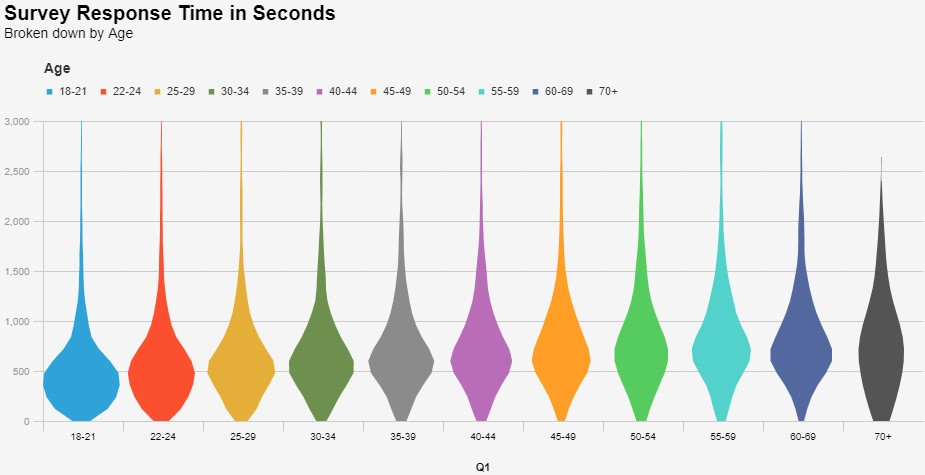

We can see the differing ages of respondents between countries more clearly if we focus on the top 8 countries by number of respondents.

In [ ]:
#only top countries

alt.Chart(df_age_country[df_age_country['Country'].isin(country_sort[:9])]).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
    y=alt.Y('Age:O'),
    color=alt.Color('Country:N', legend=alt.Legend(orient="right"))
).properties(width=320,
             background='#f5f5f5',title={
"text": ["Age of Respondents"],
"subtitle": ["Broken Down proportionally by Country"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
})

<a id="s-3"></a>
## Breakdown by Country and Highest Educational Achievement
[Back to Contents](#s-0)

Let's take a look at the breakdown of highest educational achievement by country in this Kaggle survey. Remember there can be a selection bias in these results, especially if we consider the age of respondents. Respondents aged 18-21 are unlikely to have a PhD for example! 

If there are respondents in that age group with a PhD please feel free to contact me about teaming up in future competitions ;-)

In [ ]:
education_country = df_survey_responses.groupby(['Q4', 'Q3'])
df_education_country = education_country.agg('count')
df_education_country.reset_index(inplace=True)
df_education_country=df_education_country[['Q4', 'Q3', 'Q2']]
df_education_country.columns=('education', 'country', 'Count')
df_education_country['rank'] = df_education_country['education']
education_sort_map = {"Doctoral degree": 6, 'Master’s degree': 5, "Professional degree": 4, 'Bachelor’s degree': 3, 
                  "Some college/university study without earning a bachelor’s degree": 2,
                  "No formal education past high school": 1, "I prefer not to answer": 0
                 }
df_education_country['rank'] = df_education_country['rank'].replace(education_sort_map)
df_education_country['education_rank'] = df_education_country['rank'].astype(str) + ' - ' + df_education_country['education']

In [ ]:
alt.Chart(df_education_country).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('country:N'),
    y=alt.Y('Count:Q', stack="normalize", title="Normalized Count"),
    color=alt.Color('education_rank:N', legend=alt.Legend(orient="left"))
).properties(width=520,
             background='#f5f5f5',title={
"text": ["Highest Educational Achievement Held by Respondents"],
"subtitle": ["Broken Down proportionally by Country"],
"fontSize":18, "fontWeight":600, "subtitleFontSize":14
})

<a id="s-3alt"></a>
## Breakdown by Online Educational Platforms
[Back to Contents](#s-0)

Now that we've looked at formal education, let's take a look at online educational platforms. We will log transform the counts per platform per country and provide 2 charts one for the original count and one for the transformed count.

In [ ]:
platform_options ={'Q37_Part_1': 'Coursera', 'Q37_Part_2': 'edX', 'Q37_Part_3': 'Kaggle Learn Courses',
                   'Q37_Part_4': 'DataCamp', 'Q37_Part_5': 'Fast.ai', 'Q37_Part_6': 'Udacity',
                   'Q37_Part_7': 'Udemy', 'Q37_Part_8': 'LinkedIn Learning', 'Q37_Part_9': 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
                   'Q37_Part_10': 'University Courses (resulting in a university degree)', 'Q37_Part_11': 'None', 'Q37_OTHER': 'Other',
                  }

for key in platform_options:
    ed_platform = df_survey_responses.groupby([key, 'Q3'])
    df_ed_platform = ed_platform.agg('count')
    df_ed_platform.reset_index(inplace=True)
    df_ed_platform = df_ed_platform[[key, 'Q3', 'Q2']]
    df_ed_platform.columns = ('Platform', 'country', 'Count')
    if key=='Q37_Part_1':
        df_ed_platform_full = df_ed_platform
    else:
        df_ed_platform_full = df_ed_platform_full.append(df_ed_platform)
        

#shorten longest country names
df_ed_platform_full.loc[df_ed_platform_full['Platform']=="Cloud-certification programs (direct from AWS, Azure, GCP, or similar)", "Platform"] = "Cloud-certification programs"
df_ed_platform_full.loc[df_ed_platform_full['Platform']=="University Courses (resulting in a university degree)", "Platform"] = "University Courses"

df_ed_platform_full['logCount'] = np.log(df_ed_platform_full['Count'])
df_ed_platform_full

In [ ]:
def platform_altair(df, colorfeat, colortitle):
    chrt = alt.Chart(df_ed_platform_full).mark_rect().encode(
        x=alt.X('country:N'),
        y=alt.Y('Platform:N'),
        color=alt.Color(colorfeat, legend=alt.Legend(orient="bottom"), title=colortitle)
    ).properties(width=600, height=200,
                 background='#f5f5f5',title={
    "text": ["Online Platforms Used by Respondents"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })
    
    return chrt

In [ ]:
chrt = platform_altair(df_ed_platform_full, 'Count:Q', 'Count')
chrt

Here we can see the popularity of Coursera in India. Due to the high absolute counts in India and to a lesser extent the USA, we don't learn much about alternative platforms in other countries. This is why we use a log transformed version of the chart below. We include the chart above to remind ourselves of the importance of India and the USA to the survey. The absolute counts there are much higher and we shouldn't lose sight of that when we look at log counts and percentages in other charts.

In [ ]:
log_chrt = platform_altair(df_ed_platform_full, 'logCount:Q', 'Log Count')
log_chrt

Here we see that Coursera and Kaggle Learn have some popularity in all countries. We also see that all platforms have users in almost all countries. This chart allows us to compare counts for different platforms across countries. Now let's look at percentages within each country.

In [ ]:
df_ed_platform_full = df_ed_platform_full.merge(df_country, left_on='country', right_on='Country',
          suffixes=(None, '_total'))
df_ed_platform_full['platform_pct'] = round(100 * df_ed_platform_full['Count'] / df_ed_platform_full['Count_total'],1)
df_ed_platform_full

In [ ]:
pct_chrt = platform_altair(df_ed_platform_full, 'platform_pct:Q', '% in Country')
pct_chrt

In [ ]:
df_ed_platform_full.loc[df_ed_platform_full['Country']=='Belarus']

Here we see that Coursera is the most popular platform amongst respondents in most countries. However, there are a few exceptions to this. For example, in Romania Kaggle Learn courses are more popular, whilst in Brazil Udemy just pips Coursera to be the most popular platform there. Also, although Coursera is most popular in most countries, the percentage of respondents in each country that have used it can vary dramatically. In Sri Lanka over 55% of respondents had used Coursera but in Japan it was under 22%. Also note that the percentages for each country do not need to sum to 100% because respondents were asked to select all platforms they had used.

<a id="s-4"></a>
## Breakdown by Country and Job Title
[Back to Contents](#s-0)

Let's take a look at the breakdown of job title by country.

In [ ]:
job_country = df_survey_responses.groupby(['Q5', 'Q3'])
df_job_country = job_country.agg('count')
df_job_country.reset_index(inplace=True)
df_job_country=df_job_country[['Q5', 'Q3', 'Q2']]
df_job_country.columns=('job', 'country', 'Count')

In [ ]:
alt.Chart(df_job_country).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('country:N'),
    y=alt.Y('Count:Q', stack="normalize", title="Normalized Count"),
    color=alt.Color('job:N', legend=alt.Legend(orient="left"))
).properties(width=550,
             background='#f5f5f5',title={
"text": ["Job Titles Held by Respondents"],
"subtitle": ["Broken Down proportionally by Country"],
"fontSize":18, "fontWeight":600, "subtitleFontSize":14
})

We see that in some countries approximately half of respondents are students. 

<a id="s-4a"></a>
### Data Scientists
[Back to Contents](#s-0)

Let's just focus on the job of "Data Scientist".

In [ ]:
df_job_proportions = df_job_country.merge(df_country, left_on='country', right_on='Country',
          suffixes=(None, '_total'))
df_job_proportions.drop(columns=['country'], inplace=True)
df_job_proportions['job_proportion'] = df_job_proportions['Count'] / df_job_proportions['Count_total']
df_job_proportions

In [ ]:
df_job_proportions_data_scientists = df_job_proportions.loc[df_job_proportions['job']=="Data Scientist"]
df_job_proportions_data_scientists

In [ ]:
alt.Chart(df_job_proportions_data_scientists).mark_bar(color="grey").encode(
    alt.Y('Country:N', axis=alt.Axis(grid=False)),
    alt.X('job_proportion:Q', title="Proportion of Respondents", axis=alt.Axis(grid=False))
    ).properties(width=480, height=500,
    background='#f5f5f5',title={
"text": ["Proportion of Respondents who are Data Scientists"],
"subtitle": ["Broken Down by Country"],
"fontSize":20, "fontWeight":600, "subtitleFontSize":14
})


The highest percentage of respondents who were Data Scientists was in Israel followed by Poland and France. The lowest was Sri Lanka followed by China.

<a id="s-5"></a>
## Breakdown by Years of Coding Experience
[Back to Contents](#s-0)

Here we analyse how the number of years of coding experience respondents have varies by country.

In [ ]:
experience_country = df_survey_responses.groupby(['Q6', 'Q3'])
df_experience_country = experience_country.agg('count')
df_experience_country.reset_index(inplace=True)
df_experience_country=df_experience_country[['Q6', 'Q3', 'Q2']]
df_experience_country.columns=('experience', 'country', 'Count')

df_experience_country['rank'] = df_experience_country['experience']
experience_sort_map = {"20+ years": 6, '10-20 years': 5, "5-10 years": 4, '3-5 years': 3, 
                  "1-2 years": 2,
                  "< 1 years": 1, "I have never written code": 0
                 }
df_experience_country['rank'] = df_experience_country['rank'].replace(experience_sort_map)
df_experience_country['experience_rank'] = df_experience_country['rank'].astype(str) + ' - ' + df_experience_country['experience']
df_experience_country

In [ ]:
alt.Chart(df_experience_country).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
    x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
    color=alt.Color('experience_rank:N', legend=alt.Legend(orient="bottom"), title="Years of Experience")
).properties(width=480, height=520,
             background='#f5f5f5',title={
"text": ["Years of Experience"],
"subtitle": ["Broken Down proportionally by Country"],
"fontSize":18, "fontWeight":600, "subtitleFontSize":14
})

<a id="s-6"></a>
## What Language Would you Recommend an aspiring Data Scientist Learn First?
[Back to Contents](#s-0)

This gives a view of where Data Scientists think Data Science is heading and is not clouded by the legacy of languages that Data Scientist may or may not already know. Again, following our theme we will take a look at this by country.

In [ ]:
prog_lang_country = df_survey_responses.groupby(['Q8', 'Q3'])
df_prog_lang_country = prog_lang_country.agg('count')
df_prog_lang_country.reset_index(inplace=True)
df_prog_lang_country=df_prog_lang_country[['Q8', 'Q3', 'Q2']]
df_prog_lang_country.columns=('prog_lang', 'country', 'Count')
#sort by count
df_prog_lang_country = df_prog_lang_country.sort_values(by=['Count'], ascending=False)
df_prog_lang_country.head()

In [ ]:
def prog_lang_country(df, title):
    selection = alt.selection_multi(fields=['prog_lang'], bind='legend')
    
    chart_prog_lang_country = alt.Chart(df).mark_bar(
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
        color=alt.Color('prog_lang:N', legend=alt.Legend(orient="bottom"), title="Programming Language"),
        opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).properties(width=480, height=500,
                 background='#f5f5f5',title={
    "text": [title],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    }).add_selection(
    selection
    )
    
    return chart_prog_lang_country

The chart below is interactive. Click on any programming language in the legend and it will highlight that programming language on the chart making it easier to focus in on specific data. As an example if we click on "MATLAB" in the legend at the bottom of the chart we can see it was more popular with respondents in Iran and Romania than in other countries. To remove the highlight filter click on the chart outside the legend.


In [ ]:
prog_lang_country(df_prog_lang_country, "Recommended Starting Programming Language for Data Science")

We can see that Python is by far the most popular language recommended in all countries. Perhaps not surprisingly we can see that SQL and R are both widely recommended in all countries. 

Aspiring data scientists may find more detail on skills in demand in their own country, but remember that the sample size of responses for many of the countries listed may not be very large and the results may not be very reliable as a result.

<a id="s-7"></a>
## What type of computing platform do you use most often for your data science projects?
[Back to Contents](#s-0)

Q11 asked respondents which platform they used most often for their data science projects. Let's take a look at how this breaks down by country.

In [ ]:
platform_country = df_survey_responses.groupby(['Q11', 'Q3'])
df_platform_country = platform_country.agg('count')
df_platform_country.reset_index(inplace=True)
df_platform_country=df_platform_country[['Q11', 'Q3', 'Q2']]
df_platform_country.columns=('platform', 'country', 'Count')
#sort by count
df_platform_country = df_platform_country.sort_values(by=['Count'], ascending=False)
df_platform_country.head()

In [ ]:
def platform_country_chart(df, title):
    chart_platform_country = alt.Chart(df).mark_bar(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
        color=alt.Color('platform:N', legend=alt.Legend(orient="top"), title="Platform")
    ).properties(width=400, height=500,
                 background='#f5f5f5',title={
    "text": [title],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })
    
    return chart_platform_country

In [ ]:
alt.themes.enable('vox')
platform_country_chart(df_platform_country, "Preferred Platform for Data Science")

Again we can see that there is one category that dominates in every country. Despite the growth of cloud solutions and deep learning, a personal computer or laptop is still by far the most popular choice. Let's take a look at the other categories excluding personal computers.

In [ ]:
df_platform_country = df_platform_country.loc[df_platform_country['platform']!="A personal computer or laptop"]
alt.themes.enable('vox')
platform_country_chart(df_platform_country, "Preferred Platform for Data Science (excluding pc's)")

In most countries it looks like a cloud-based platform is the second most popular, although this doesn't seem to be true in Belgium or Viet Nam where deep learning solutions are more popular.

<a id="s-8"></a>
## TPU Usage
[Back to Contents](#s-0)

Staying on the them of hardware let's see how many times respondents have used TPU's. (TPU's are specialized hardware than enable fast processing of neural networks.)

In [ ]:
tpu_country = df_survey_responses.groupby(['Q13', 'Q3'])
df_tpu_country = tpu_country.agg('count')
df_tpu_country.reset_index(inplace=True)
df_tpu_country=df_tpu_country[['Q13', 'Q3', 'Q2']]
df_tpu_country.columns=('tpu_usage', 'country', 'Count')
#sort by count
df_tpu_country = df_tpu_country.sort_values(by=['Count'], ascending=False)
df_tpu_country.head()

df_tpu_country['rank'] = df_tpu_country['tpu_usage']
tpu_sort_map = {"More than 25 times": 0, '6-25 times': 1, 
                  "2-5 times": 2,
                  "Once": 3, "Never": 4
                 }
df_tpu_country['rank'] = df_tpu_country['rank'].replace(tpu_sort_map)
df_tpu_country['tpu_usage_rank'] = df_tpu_country['rank'].astype(str) + ' - ' + df_tpu_country['tpu_usage']

In [ ]:
alt.themes.enable('latimes')
bars = alt.Chart(df_tpu_country).mark_bar(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
        color=alt.Color('tpu_usage_rank:N', legend=alt.Legend(orient="top"), title="TPU Usage")
    ).properties(width=400, height=500,title={
    "text": ["TPU Usage"],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })

bars

In all countries the most popular response "Never" shows that most respondents have not used a TPU. The leading countries in terms of TPU usage are Viet Nam, Peru and Romania whilst TPU usage is least frequent in Ireland. Once again we should consider the issues of sample size and selection bias in drawing too many conclusions from our dataset.

<a id="s-9"></a>
## Years using Machine Learning methods
[Back to Contents](#s-0)

Here we analyze the number of years of experience with machine learning methods that respondents have by country.

In [ ]:
ml_country = df_survey_responses.groupby(['Q15', 'Q3'])
df_ml_country = ml_country.agg('count')
df_ml_country.reset_index(inplace=True)
df_ml_country=df_ml_country[['Q15', 'Q3', 'Q2']]
df_ml_country.columns=('ml_years', 'country', 'Count')
#sort by count
df_ml_country = df_ml_country.sort_values(by=['Count'], ascending=False)
df_ml_country.head()

In [ ]:
df_ml_country['ml_years'].unique()

In [ ]:
df_ml_country['rank'] = df_ml_country['ml_years']
ml_sort_map = {"I do not use machine learning methods": 0, 'Under 1 year': 1, 
                  "1-2 years": 2, "2-3 years": 3, "3-4 years": 4,
                "4-5 years":5, "5-10 years":6, "10-20 years":7,
                "20 or more years":8
                  
                 }
df_ml_country['rank'] = df_ml_country['rank'].replace(ml_sort_map)
df_ml_country['ml_years_rank'] = df_ml_country['rank'].astype(str) + ' - ' + df_ml_country['ml_years']

df_ml_country = df_ml_country.sort_values(by=['ml_years_rank'], ascending=False)

df_ml_country.head()

In [ ]:
alt.themes.enable('default')
alt.Chart(df_ml_country).mark_bar().encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', title="Count"),
        color=alt.Color('ml_years_rank:N', legend=alt.Legend(orient="top"), title="Years using ML methods")
    ).properties(width=400, height=500,title={
    "text": ["Years using ML methods"],
    "subtitle": ["Broken Down by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    }
    )

Here we can see that the biggest single group of respondents is Indian respondents with under 1 year of experience using Machine Learning methods. We will normalize the data so that we can see a clearer picture for countries with fewer respondents.

In [ ]:
bars_ml = alt.Chart(df_ml_country).mark_bar(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
        color=alt.Color('ml_years_rank:N', legend=alt.Legend(orient="top"), title="Years using ML methods")
    ).properties(width=500, height=500,title={
    "text": ["Years using ML methods"],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })

bars_ml

We can see that Belgium has the highest proportion of respondents who have 20+ years of experience with Machine Learning methods whilst Saudi Arabia and Thailand have the most newcomers to Machine Learning. Let's visualize on a map the proportion of respondents who have at least 5 years experience with ML methods by country.

In [ ]:
# Add the country code for a new choropleth map
df_ml_country['country_code'] = df_ml_country['country']
df_ml_country.replace({"country_code": country_codes}, inplace=True)

#merge to get total respondents per country
df_ml_country = df_ml_country.merge(df_country, left_on='country', right_on='Country', suffixes=(None, '_total'))

In [ ]:
df_ml_country['ML_experience_freq_pct'] = 100 * df_ml_country['Count'] / df_ml_country['Count_total']
df_ml_country

In [ ]:
df_ml_country_5_plus = df_ml_country[df_ml_country['ml_years_rank'].isin(['6 - 5-10 years', '7 - 10-20 years','8 - 20 or more years'])]
df_ml_country_5_plus

In [ ]:
df_ml_5_plus = df_ml_country_5_plus.groupby(['country_code'])
df_ml_5_plus = df_ml_5_plus.agg('ML_experience_freq_pct').sum().to_frame().reset_index()
df_ml_5_plus['ML_experience_freq_pct'] = np.round(df_ml_5_plus['ML_experience_freq_pct'],1)
df_ml_5_plus

In [ ]:
fig = px.choropleth(data_frame=df_ml_5_plus,
                    locations='country_code',
                    color='ML_experience_freq_pct',
                    color_continuous_scale="agsunset",
                    range_color=(0, 25),
                    hover_name='country_code', # column to add to hover information
                    title='% Respondents with 5+ years experience of ML Methods')
fig.show()

The chart above is interactive so feel free to zoom into your home country. If you click on a country you can get the percentage displayed in a popup. We can see in general that there are few respondents with 5+ years of experience with ML methods.

<a id="s-9x"></a>
## Primary Analysis Toolset
[Back to Contents](#s-0)

Let's see what respondents use as their primary analysis toolset in each country.

In [ ]:
primary_analysis = df_survey_responses.groupby(['Q38', 'Q3'])
df_primary_analysis = primary_analysis.agg('count')
df_primary_analysis.reset_index(inplace=True)
df_primary_analysis=df_primary_analysis[['Q38', 'Q3', 'Q2']]
df_primary_analysis.columns=('primary_analysis', 'country', 'Count')
df_primary_analysis['logCount'] = np.log(df_primary_analysis['Count'])

#sort by count
df_primary_analysis = df_primary_analysis.sort_values(by=['Count'], ascending=False)
df_primary_analysis

In [ ]:
df_primary_analysis['primary_analysis'].unique()

In [ ]:
df_primary_analysis['primary_analysis_abbr'] = df_primary_analysis['primary_analysis']
primary_analysis_sort_map = {'Local development environments (RStudio, JupyterLab, etc.)': 'Local development environments',
                             'Basic statistical software (Microsoft Excel, Google Sheets, etc.)': 'Basic statistical software',
                            'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)': 'Business intelligence software',
                            'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)': 'Cloud-based data software & APIs',
                            'Advanced statistical software (SPSS, SAS, etc.)': 'Advanced statistical software',
                 }
df_primary_analysis['primary_analysis_abbr'] = df_primary_analysis['primary_analysis_abbr'].replace(primary_analysis_sort_map)
df_primary_analysis

In [ ]:
def analysis_altair(df, colorfeat, colortitle):
    chrt = alt.Chart(df).mark_rect().encode(
        x=alt.X('country:N'),
        y=alt.Y('primary_analysis_abbr:N', title="Primary Analysis Toolset"),
        color=alt.Color(colorfeat, legend=alt.Legend(orient="bottom"), title=colortitle)
    ).properties(width=600, height=160,
                 background='#f5f5f5',title={
    "text": ["Primary Analysis Toolset Used by Respondents"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })
    
    return chrt

First we look at the log count per country. We see that Basic Statistical Software - Microsoft Excel, Google Sheets, etc. and Local development environments - (RStudio, JupyterLab, etc.) are the most popular categories. We can also see that a few categories did not get any responses in certain countries. For example no respondents in Switzerland used Cloud-based data software. This may well be an artifact of the data and we should note infer too much from this.

In [ ]:
analysis_log_chrt = analysis_altair(df_primary_analysis, 'logCount:Q', 'Log Count')
analysis_log_chrt
#pct_chrt = platform_altair(df_primary_analysis, 'platform_pct:Q', '% in Country')
#pct_chrt

In [ ]:
df_primary_analysis = df_primary_analysis.merge(df_country, left_on='country', right_on='Country',
          suffixes=(None, '_total'))
df_primary_analysis['primary_analysis_pct'] = round(100 * df_primary_analysis['Count'] / df_primary_analysis['Count_total'],1)
df_primary_analysis = df_primary_analysis.sort_values(by=['primary_analysis_pct'], ascending=False)
df_primary_analysis

In [ ]:
analysis_pct_chrt = analysis_altair(df_primary_analysis, 'primary_analysis_pct:Q', '% by Country')
analysis_pct_chrt

In [ ]:
df_primary_analysis.loc[df_primary_analysis['Country']=='Japan']

In [ ]:
# Add the country code for a new choropleth map
df_primary_analysis['country_code'] = df_primary_analysis['country']
df_primary_analysis.replace({"country_code": country_codes}, inplace=True)

In [ ]:
df_primary_analysis_local = df_primary_analysis.loc[df_primary_analysis['primary_analysis_abbr']=='Local development environments']

We can see that in most countries local development environments were the most popular analysis toolset amongst respondents. However, even in the country (Switzerland) where this value was highest, it was still under 50% (percentage includes those who did not answer this question). In some countries Basic Statistical software was the most popular category amongst respondents e.g. Egypt, Japan, Peru, Philipines. Unlike some of our other analyses there doesn't seem to be a clear geographic proximity pattern that explains this. However, there are many potential factors that could contribute to this. It could be to do with the age of respondents, or the type of jobs they do, or simply an artifact of the data. Let's plot this on a map to see if this provides any further insights.

In [ ]:
fig = px.choropleth(data_frame=df_primary_analysis_local,
                    locations='country_code',
                    color='primary_analysis_pct',
                    color_continuous_scale="agsunset",
                    range_color=(0, 50),
                    hover_name='Country', # column to add to hover information
                    title='% Respondents primarily using Local Development Environment')
fig.show()

It seems that this option is less popular amongst respondents in much of Asia. There are many possible reasons for this which could make an interesting notebook in itself. One important factor could be the relatively younger age of respondents there which we have already observed, but I won't attempt a full explanation here.

<a id="s-10"></a>
## Company Size
[Back to Contents](#s-0)

Respondents were asked about the size of the company that they work for. Here we break down their answers by country.

In [ ]:
company_size = df_survey_responses.groupby(['Q20', 'Q3'])
df_company_size = company_size.agg('count')
df_company_size.reset_index(inplace=True)
df_company_size=df_company_size[['Q20', 'Q3', 'Q2']]
df_company_size.columns=('company_size', 'country', 'Count')
df_company_size['rank'] = df_company_size['company_size']
company_size_sort_map = {"10,000 or more employees": 4, '1000-9,999 employees': 3, 
                  "250-999 employees": 2,
                  "50-249 employees": 1, "0-49 employees": 0
                 }
df_company_size['rank'] = df_company_size['rank'].replace(company_size_sort_map)
df_company_size['company_size_rank'] = df_company_size['rank'].astype(str) + ' - ' + df_company_size['company_size']

df_company_size

In [ ]:
bars_company_size = alt.Chart(df_company_size).mark_bar(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', stack="normalize", title="Normalized Count"),
        color=alt.Color('company_size_rank:N', legend=alt.Legend(orient="bottom"), title="Company Size")
    ).properties(width=500, height=500,title={
    "text": ["Company Size of Respondent's Employer"],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })

bars_company_size

We can see that in most countries the smallest employer size was the most popular at 0-49 employees. The country with the highest proportion of respondents in this category is Nepal closely followed by Morocco and Nigeria. In Portugal, Poland, Japan and Singapore respondents tended to work for larger companies.

<a id="s-11"></a>
## How many people are responsible for Data Science workloads at the place of business?
[Back to Contents](#s-0)

Looking now at the number of Data Scientists rather than the overall number of employees.

In [ ]:
data_scientists = df_survey_responses.groupby(['Q21', 'Q3'])
df_data_scientists = data_scientists.agg('count')
df_data_scientists.reset_index(inplace=True)
df_data_scientists=df_data_scientists[['Q21', 'Q3', 'Q2']]
df_data_scientists.columns=('data_scientists', 'country', 'Count')

df_data_scientists['rank'] = df_data_scientists['data_scientists']
data_scientists_sort_map = {"20+": 6, "15-19": 5, "10-14": 4, '5-9': 3, 
                  "3-4": 2,
                  "1-2": 1, "0": 0
                 }
df_data_scientists['rank'] = df_data_scientists['rank'].replace(data_scientists_sort_map)
df_data_scientists['data_scientists_rank'] = df_data_scientists['rank'].astype(str) + ' - ' + df_data_scientists['data_scientists']

df_data_scientists

In [ ]:
bubble_plot_company_size = alt.Chart(df_data_scientists).mark_circle(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('Count:Q', title="Count"),
        color=alt.Color('data_scientists_rank:N', legend=alt.Legend(orient="bottom"), title=""),
        size=alt.Size('Count:Q'),    
    ).properties(width=500, height=500,title={
    "text": ["Number of people responsible for Data Science workloads at place of Business"],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })

bubble_plot_company_size

We have double-encoded the count for each category. It is encoded on the x axis and in the size of the circle. From this chart we can see that in the USA and India the largest single group of respondents were in places of business that had at least 20 people responsible for Data Science workloads. However, in other countries with a large number of overall respondents the picture is quite different. In Brazil, China, Canada and in the "Other" category (responses grouped together from countries with less than 50 responses each) the most popular response was that only 1 or 2 people were responsible for Data Science workloads in the place of business. Meanwhile, in Japan and Russia, the most common answer was that 0 people were responsible for Data Science workloads. This suggests that those businesses are not doing Data Science. However, it could also potentially suggest that the question needs to be reworded. "Responsible for Data Science workloads" could mean anyone who works in Data Science, or, Data Science managers.

<a id="s-12"></a>
## Machine Learning
[Back to Contents](#s-0)

Does the place of business incorporate Machine Learning? Let's see specifically the proportion of respondents whose place of business incorporates ML in production.

In [ ]:
ml = df_survey_responses.groupby(['Q22', 'Q3'])
df_ml = ml.agg('count')
df_ml.reset_index(inplace=True)
df_ml=df_ml[['Q22', 'Q3', 'Q2']]
df_ml.columns=('ml', 'country', 'Count')

df_ml['ml'].unique()

In [ ]:
df_ml_prod = df_ml.loc[df_ml['ml'].isin(['We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)'])]
df_ml_prod = df_ml_prod.drop(columns=['ml'])

#get prod totals
ml_prod = df_ml_prod.groupby(['country'])
df_ml_prod = ml_prod.agg('sum').reset_index()

#get overall totals
ml_total = df_ml.groupby(['country'])
df_ml_total = ml_total.agg('sum').reset_index()


df_ml_prod = df_ml_prod.merge(df_ml_total[['country', 'Count']], left_on='country', right_on='country',
          suffixes=('_prod', '_total'))

df_ml_prod['country_code'] = df_ml_prod['country']
df_ml_prod.replace({"country_code": country_codes}, inplace=True)

df_ml_prod['ml_in_prod_pct'] = round(100 * df_ml_prod['Count_prod'] / df_ml_prod['Count_total'],1)
df_ml_prod

df_ml_prod_sorted = df_ml_prod.sort_values(by=['ml_in_prod_pct'], ascending=False)
df_ml_prod_sorted

In [ ]:
def ml_prod(df, subtitle, sort=None):
    ml_prod_chart = alt.Chart(df_ml_prod).mark_bar(
            cornerRadiusTopLeft=3,
            cornerRadiusTopRight=3
        ).encode(
            y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0), sort=sort),
            x=alt.X('ml_in_prod_pct:Q', title="%"),
        ).properties(width=200, height=500, title={
        "text": ["ML models in Production"],
        "subtitle": subtitle,        
        "fontSize":16, "fontWeight":600, "subtitleFontSize":12
        })
    
    return ml_prod_chart

bar_years_ml = ml_prod(df_ml_prod, "% whose place of Business Uses")
bar_years_ml_sorted = ml_prod(df_ml_prod_sorted, "% whose place of Business Uses", "-x")

bar_years_ml | bar_years_ml_sorted

In [ ]:
fig = px.choropleth(data_frame=df_ml_prod,
                    locations='country_code',
                    color='ml_in_prod_pct',
                    color_continuous_scale="turbo",
                    range_color=(10, 55),
                    hover_name='country', # column to add to hover information
                    title='% Respondents whose place of business uses ML in Production')
fig.show()

Where the respondent's places of business is in Europe and North America plus Israel, Australia and South Africa, the place of business is more likely to have ML models in production. Brazil, Russia, India and China (the original BRIC nations) all report very similar results on this metric slightly behind most of Europe but ahead of Spain and Ireland. ML is less established in production in other parts of Africa.

<a id="s-13"></a>
## Rates of Pay

[Back to Contents](#s-0)

Let's take a look at rates of pay by country. (Remember rates of pay will be impacted by other variables such as age and years of experience.)

In [ ]:
pay = df_survey_responses.groupby(['Q24', 'Q3'])
df_pay = pay.agg('count')
df_pay.reset_index(inplace=True)
df_pay=df_pay[['Q24', 'Q3', 'Q2']]
df_pay.columns=('pay', 'country', 'Count')

df_pay['pay'].unique()

In [ ]:
df_pay['rank'] = df_pay['pay']
pay_sort_map = {"> $500,000": '24', "300,000-500,000": '23', "250,000-299,999": '22', '200,000-249,999': '21',
                "150,000-199,999": '20', "125,000-149,999": '19', "100,000-124,999": '18', '90,000-99,999': '17',
                "80,000-89,999": '16', "70,000-79,999": '15', "60,000-69,999": '14', '50,000-59,999': '13',
                "40,000-49,999": '12', "30,000-39,999": '11', "25,000-29,999": '10', '20,000-24,999': '09',
                "15,000-19,999": '08', "10,000-14,999": '07', "7,500-9,999": '06', '5,000-7,499': '05',
                "4,000-4,999": '04', "3,000-3,999": '03', "2,000-2,999": '02', '1,000-1,999': '01', 
                '$0-999': '00'
                 }
df_pay['rank'] = df_pay['rank'].replace(pay_sort_map)
df_pay['pay_rank'] = df_pay['rank'].astype(str) + ' - ' + df_pay['pay']

df_pay

df_pay = df_pay.merge(df_country[['Country', 'Count']], left_on='country', right_on='Country',
          suffixes=('_pay_category', '_total'))
df_pay['pay_pct'] = round(100 * df_pay['Count_pay_category'] / df_pay['Count_total'],1)
df_pay

In [ ]:
bubble_plot_pay = alt.Chart(df_pay).mark_circle(
        cornerRadiusTopLeft=3,
        cornerRadiusTopRight=3
    ).encode(
        y=alt.Y('country:N', axis=alt.Axis(grid=False, titleAngle=0)),
        x=alt.X('pay_rank:O', title="Pay", axis=alt.Axis(grid=False, labelAngle=270)),
        color=alt.Color('pay_rank:O', legend=None, title=""),
        size=alt.Size('pay_pct:Q'),    
    ).properties(width=570, height=500,title={
    "text": ["Salaries"],
    "subtitle": ["Broken Down proportionally by Country"],
    "fontSize":18, "fontWeight":600, "subtitleFontSize":14
    })

bubble_plot_pay

We can see quite a lot of respondents in the first category earning under 1000USD. This likely includes students. The first few categories may include people who work part time. At the other end of the scale we can see a non-negligible subset who earn over 500,000USD. We can also see that the distribution is skewed differently in different countries. For example in the USA and Switzerland it is skewed to the right more than in most other countries. We should also bear in mind that these figures do not take into account the cost of living in the respective countries. This can be higher in countries with higher average incomes. This means that the income difference between respondents in different countries may be considerably greater than the difference in spending power between respondents in those countries.

### Conclusion
Data Science is flourishing in 2020. We can see respondents to the Kaggle survey from over 50 different countries. By working through the data in the survey breaking down the information by country we have found many interesting insights. For example respondents from India have tended to be younger than those from the US. Respondents from Iran and Switzerland have been more likely to have a PhD. Respondents from Sweden were more likely to have 20+ years of coding experience. Deep Learning platforms are more popular than cloud-based platforms with respondents in Belgium and Viet Nam. TPU usage was highest amongst respondents in Viet Nam. Respondents from Switzerland are most likely to have 5 or more years of experience using machine learning methods. In India and the USA, respondents were most likely to work for companies with 20 or more Data Scientists but in Brazil, Canada and China respondents were most likely to work for companies where there were only 1-2 people working on Data Science. Based on observations of respondents, ML models were most likely to reach production in Israel followed by Belarus and the UK.

However, as per the caveats previously stated, we must recognise that we are looking at the real-world data available in the survey. This sample may suffer from selection bias and sampling error. The results noted here are based on this data and may not all extrapolate to be fully representative of all countries for all of the questions we have looked at.

I hope this notebook was interesting and insightful and that you learnt something new about the state of Data Science in your own country and the changing state of Data Science globally.

Let me know your thoughts and any feedback in the comments below. If you liked the notebook or found it helpful please upvote.

[Back to Top](#s-top)